# CAB BOOKING PREDICTION


Import the required libraries and load the training and testing dataset

In [1]:
#Import all required libararies and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Reading csv files as train and test dataset
xtrain_df = pd.read_csv('train.csv')
ytrain_df = pd.read_csv('train_label.csv',header=None,names = ['Total_booking'])
xtest_df = pd.read_csv('test.csv')
ytest_df = pd.read_csv('test_label.csv',header=None,names = ['Total_booking'])

In [3]:
#Concatenate the Input features and Output
train_df = pd.concat([xtrain_df,ytrain_df],axis=1,ignore_index=False)
test_df = pd.concat([xtest_df,ytest_df],axis=1,ignore_index=False)

In [4]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [5]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


In [6]:
#Checking the shape of the training and testing set
print('Shape of training dataset is :',train_df.shape)
print('Shape of test dataset is :',test_df.shape)

Shape of training dataset is : (8708, 10)
Shape of test dataset is : (2178, 10)


In [7]:
print('Datatype of each column of training dataset is:')
print(train_df.info())

Datatype of each column of training dataset is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
datetime         8708 non-null object
season           8708 non-null object
holiday          8708 non-null int64
workingday       8708 non-null int64
weather          8708 non-null object
temp             8708 non-null float64
atemp            8708 non-null float64
humidity         8708 non-null int64
windspeed        8708 non-null float64
Total_booking    8708 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB
None


In [8]:
print('Datatype of each column of test dataset is:')
print(test_df.info())

Datatype of each column of test dataset is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 10 columns):
datetime         2178 non-null object
season           2178 non-null object
holiday          2178 non-null int64
workingday       2178 non-null int64
weather          2178 non-null object
temp             2178 non-null float64
atemp            2178 non-null float64
humidity         2178 non-null int64
windspeed        2178 non-null float64
Total_booking    2178 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 170.2+ KB
None


We can see datatype of datetime,season,weather is 'object' so we might need to convert datatypes 
of these columns into 'category' in subsequent code.

In [9]:
#Checking the missing values present in the dataset
train_df.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

In [10]:
test_df.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

There are no missing value present in either Train or Test dataset.

In [11]:
#Checking the missing values present in the dataset
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

In [12]:
#Creating separate columns for training Dataset
train_df['date of month'] = train_df['datetime'].dt.day
train_df['month'] = train_df['datetime'].dt.month
train_df['day of week'] = train_df['datetime'].dt.dayofweek
train_df['hour'] = train_df['datetime'].dt.hour

In [13]:
#Applying same function of Test dataset to create new columns:
test_df['date of month'] = test_df['datetime'].dt.day
test_df['month'] = test_df['datetime'].dt.month
test_df['day of week'] = test_df['datetime'].dt.dayofweek
test_df['hour'] = test_df['datetime'].dt.hour

In [14]:
#Displaying Distinct values of Weather in training Data
print(train_df.weather.unique())

[' Clear + Few clouds' ' Light Snow, Light Rain' ' Mist + Cloudy '
 ' Heavy Rain + Thunderstorm ']


In [15]:
#As we see that there are unrequired spaces and colon present, we need to remove and make data uniform.
train_df['weather'] = train_df['weather'].str.replace(',','+')
train_df['weather'] = train_df['weather'].str.replace(' ','')

In [16]:
#Displaying Distinct values of Weather in test Data
print(test_df.weather.unique())

[' Clear + Few clouds' ' Light Snow, Light Rain' ' Mist + Cloudy ']


As we can see that in test dataset, we only have three weather types. To avoid Index error in future, we have to drop ' Heavy Rain + Thunderstorm ' weather from training dataset

In [17]:
train_df.drop(train_df[train_df['weather'] == 'HeavyRain+Thunderstorm'].index,inplace=True)

In [18]:
#Displaying Distinct values of Weather in training Data
print(train_df.weather.unique())

['Clear+Fewclouds' 'LightSnow+LightRain' 'Mist+Cloudy']


In [19]:
#As we see that similar problem as training dataset,We need to apply same function on test dataset as well.
test_df['weather'] = test_df['weather'].str.replace(',','+')
test_df['weather'] = test_df['weather'].str.replace(' ','')

In [20]:
#Converting Weather,Season into Categorical datatype
train_df[['season','weather','holiday','workingday']] =train_df[['season','weather','holiday','workingday']].astype('category')

In [21]:
#Applying same function on Test Dataset
test_df[['season','weather','holiday','workingday']] = test_df[['season','weather','holiday','workingday']].astype('category')

In [22]:
print(train_df.dtypes[['season','weather','holiday','workingday']])

season        category
weather       category
holiday       category
workingday    category
dtype: object


In [23]:
print(test_df.dtypes[['season','weather','holiday','workingday']])

season        category
weather       category
holiday       category
workingday    category
dtype: object


In [24]:
#Dropping the datetime column as we have already extracted useful features from it
train_df.drop('datetime',inplace=True,axis=1)
test_df.drop('datetime',inplace=True,axis=1)

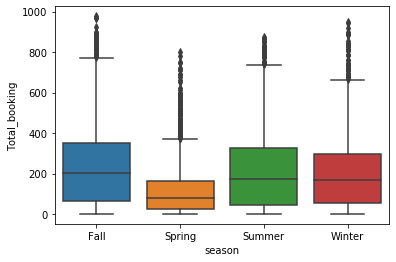

In [25]:
#Checking the outlier
sns.boxplot(y='Total_booking',x='season',data=train_df)

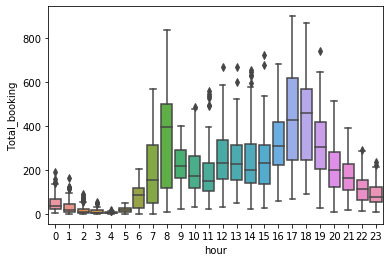

In [26]:
sns.boxplot(y='Total_booking',x='hour',data=test_df)

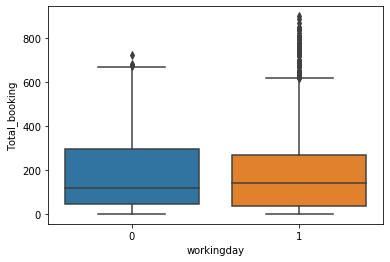

In [27]:
sns.boxplot(y='Total_booking',x='workingday',data=test_df)

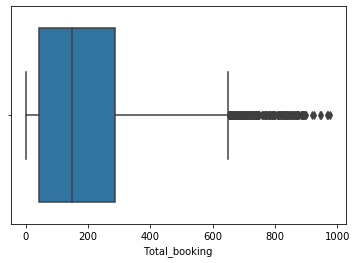

In [28]:
sns.boxplot(x=train_df['Total_booking'])

As we can see that there are outliers present in the dataset with respect to total booking.Hence we need to remove them.

In [29]:
#Removing the Outliers
Q1 = np.percentile(train_df['Total_booking'],25,interpolation='midpoint')
Q3 = np.percentile(train_df['Total_booking'],75,interpolation='midpoint')
IQR = Q3 -Q1
Upper_limit = Q3 + 1.5*IQR
upper = np.where(train_df['Total_booking'] >= Upper_limit)
train_df.drop(upper[0], inplace = True)

In [30]:
#Checking shape of Dataset after removing outliers
train_df.shape

(8465, 13)

Q5. Perform Correlation Analysis:

Q5a. Plot a correlation plot between "total booking" and ["temp", "atemp", "humidity", "windspeed"]

In [31]:
corr_df = train_df[['Total_booking','temp','atemp','windspeed']]

(4.0, 0.0)

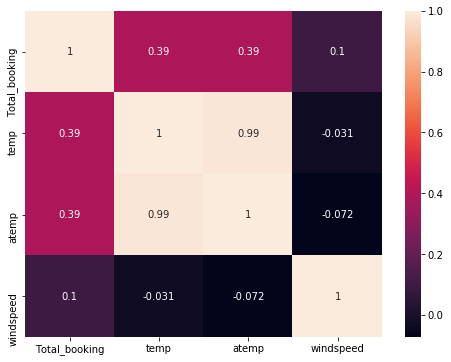

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(corr_df.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

From Correlation plot, we can observer that Total booking is very weakly co-related with Windspeed and 
fairly related with temp and atemp. Thus we will drop Windspeed column.

Also temp and atemp columns are highly correlated. Hence we will drop atemp column as well

In [33]:
#Dropping Windspeed and atemp columns from Train and Test dataset
train_df.drop(['windspeed','atemp'],inplace=True,axis=1)
test_df.drop(['windspeed','atemp'],inplace=True,axis=1)

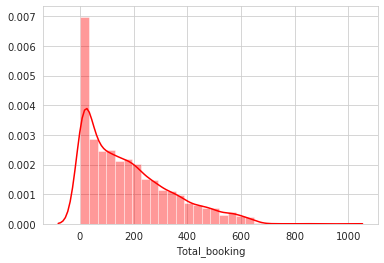

In [34]:
#Plotting Probability Distribution plot for Total Booking
sns.set_style('whitegrid')
sns.distplot(train_df['Total_booking'],kde=True,color='red',bins=30)

From the above plot, we can conclude data is right skewed.

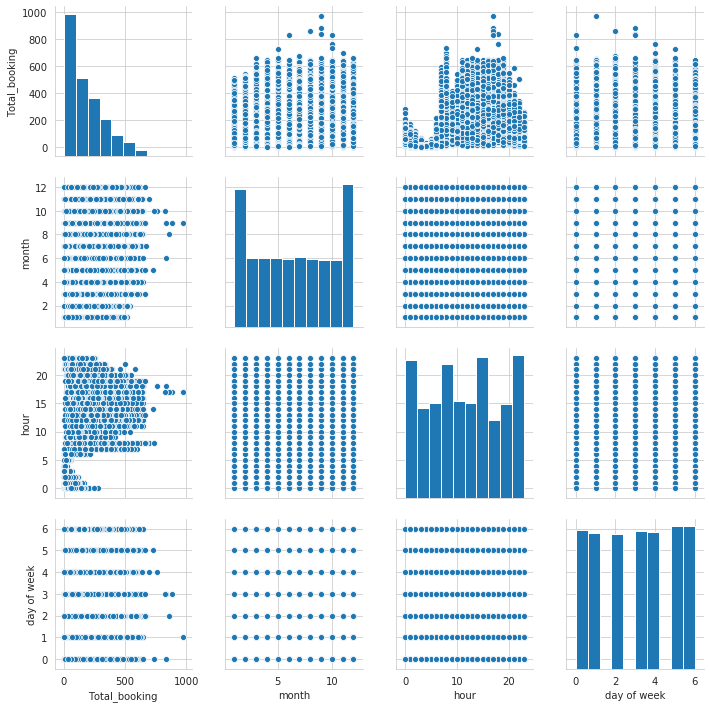

In [35]:
#Visualizing total_booking vs (Month, Season, Hour, Weekday, Usertype)
sns.pairplot(train_df[['Total_booking','month','season','hour','day of week']])

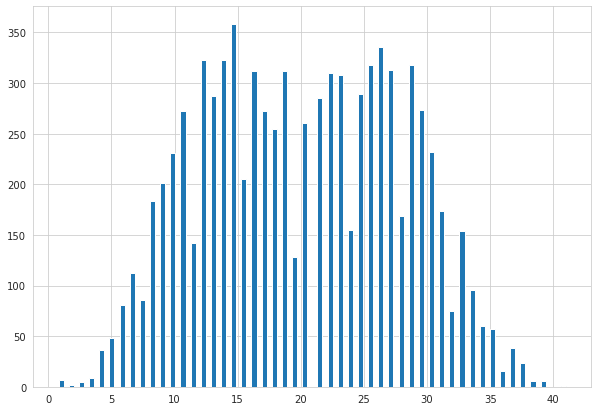

In [36]:
fig,ax = plt.subplots(figsize=(10,7))
ax.hist(train_df['temp'],bins=100)
plt.show()

We have 4 categorical columns in our dataset : season,weather,holiday and workingday. We need to convert into numerical data

In [37]:
train_df = pd.get_dummies(train_df,drop_first=True)

In [38]:
test_df = pd.get_dummies(test_df,drop_first=True)

In [39]:
#Split your dataset for training and testing
#Creating Predictor and Target columns
X_features = list(train_df.columns)
X_features.remove('Total_booking')
X = train_df[X_features]
Y = train_df['Total_booking']

In [40]:
#Splitting the data
train_x,test_x,train_y,test_y = train_test_split(X,Y,train_size=0.8,random_state=100)

Fit various models (Random Forest Regressor, Ada Boost Regressor, Bagging Regressor, SVR, and K-Neighbors Regressor)

In [41]:
#Fitting RandomForestRegressor Model
rfr = RandomForestRegressor(random_state=100)
rfr.fit(train_x,train_y)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)

In [42]:
#Predicting output variable and calculating mean squared error
pred_rfr = rfr.predict(test_x)
rmse_rfr = np.sqrt(metrics.mean_squared_error(test_y, pred_rfr)) 

In [43]:
#Fitting AdaBoostRegressor Model
abr = AdaBoostRegressor(random_state=100)
abr.fit(train_x,train_y)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=100)

In [44]:
#Predicting output variable and calculating mean squared error
pred_abr = abr.predict(test_x)
rmse_abr = np.sqrt(metrics.mean_squared_error(test_y, pred_abr)) 

In [45]:
#Fitting BaggingRegressor Model
br = BaggingRegressor(random_state=100)
br.fit(train_x,train_y)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=100, verbose=0,
                 warm_start=False)

In [46]:
#Predicting output variable and calculating mean squared error
pred_br = br.predict(test_x)
rmse_br = np.sqrt(metrics.mean_squared_error(test_y, pred_br)) 

In [47]:
#Fitting SVR Model
svr = SVR()
svr.fit(train_x,train_y)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
#Predicting output variable and calculating mean squared error
pred_svr = svr.predict(test_x)
rmse_svr = np.sqrt(metrics.mean_squared_error(test_y, pred_svr))

In [49]:
#Fitting KNeighborsRegressor Model
knr = KNeighborsRegressor()
knr.fit(train_x,train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [50]:
#Predicting output variable and calculating mean squared error
pred_knr = knr.predict(test_x)
rmse_knr = np.sqrt(metrics.mean_squared_error(test_y, pred_knr)) 

Display a Factor plot to visualize the RMSE values achieved by different modeling algorithm

In [51]:
model_df = pd.DataFrame({'Model Name':['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor'],
                        'RMSE Values':[rmse_rfr,rmse_abr,rmse_br,rmse_svr,rmse_knr]})

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


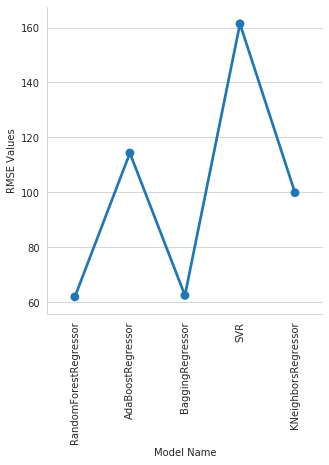

In [52]:
sns.factorplot(x='Model Name',y='RMSE Values',data = model_df)
plt.xticks(rotation=90)
plt.show()

From the above Factor Plot, we can conclude that RandomForestRegressor is the best Fitting Model.
We will tweak its hyperparameters to improve the model.

Performing Hyper-parameter tuning on the best model using GridSearchCV 

Parameter to Conseider is:
    1.max_depth
    2.min_sample_split
    3.min_sample_leaf
    4.n_estimators



In [53]:
tuned_parameters = [{'n_estimators': [10,30,50],
                     'max_depth':[5,15,30]}]

In [54]:
gs = GridSearchCV(RandomForestRegressor(),tuned_parameters,scoring='r2')

In [55]:
gs.fit(train_x,train_y)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [5, 15, 30],

In [56]:
gs.best_score_

0.8428104837529592

In [57]:
gs.best_params_

{'max_depth': 30, 'n_estimators': 50}

Now we have got best parameters, we will build final model using Optimal parameter value:

In [58]:
br = RandomForestRegressor(random_state=100,max_depth=30,n_estimators=50)
br.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)

Q12. Perform prediction on the test set and print the mean_squared_log_error

In [59]:
#Creating Predictor and Target columns
X_features_test = list(test_df.columns)
X_features_test.remove('Total_booking')
X_test = test_df[X_features_test]
Y_test = test_df['Total_booking']

In [60]:
#Predicting and printing mean squared log error
pred_test = br.predict(X_test)
print(mean_squared_log_error(Y_test,pred_test))

0.17703602999488494
